In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
zip_path = tf.keras.utils.get_file(origin = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [3]:
df = pd.read_csv(csv_path)
df = df[5::6] ## Slice [strat:stop:step], starting from index 5 take every 6th record

date_time = pd.to_datetime(df.pop('Date Time'), format = '%d.%m.%Y %H:%M:%S')

##### pop() :- This method removes the specified column from the DataFrame and returns the column as a Series. In this case, it removes the 'Date Time' column from 'df'.
##### It then converts the 'Date Time' column to a pandas datetime object using the 'pd.to_datetime()' function

In [4]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


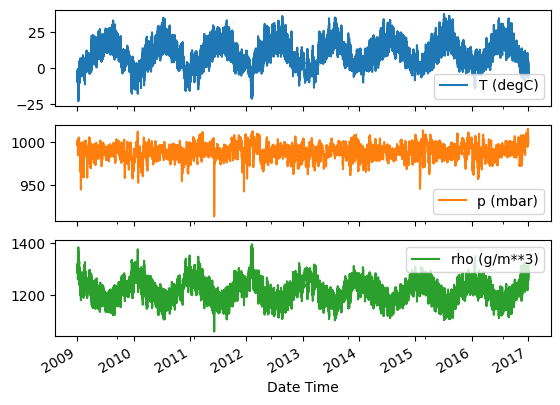

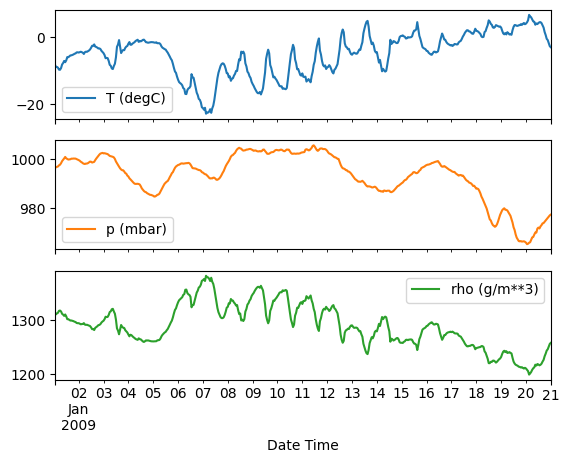

In [5]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)   ## The subplots=True argument is used to create separate subplots for each column, so we'll see individual plots for temperature, pressure, and density.

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


## Wind Velocity

In [7]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

df['wv (m/s)'].min()

0.0

## Feature Engineering

#### Distribution of wind data looks like this

Text(0, 0.5, 'Wind Velocity [m/s]')

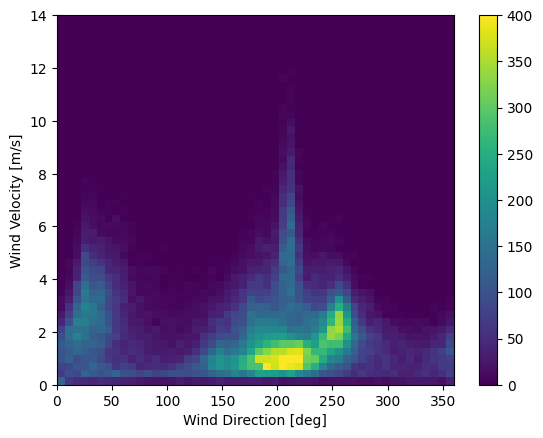

In [8]:
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins = (50,50), vmax = 400)
# This line creates a 2D histogram plot. 
# The bins=(50, 50) argument specifies the number of bins along each axis, creating a 50x50 grid for the histogram.
# vmax = maximum color value

plt.colorbar() ## add colorbar to the plot
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')


***This will be easier if we convert the wind direction and velocity to 'wind vector'***

In [9]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# convert to radians
wd_rad = df.pop('wd (deg)')*np.pi/180

# calculate the wind x and y components
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# calculate the max wind x and y components
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

(-11.305513973134667, 8.24469928549079, -8.27438540335515, 7.7338312955467785)

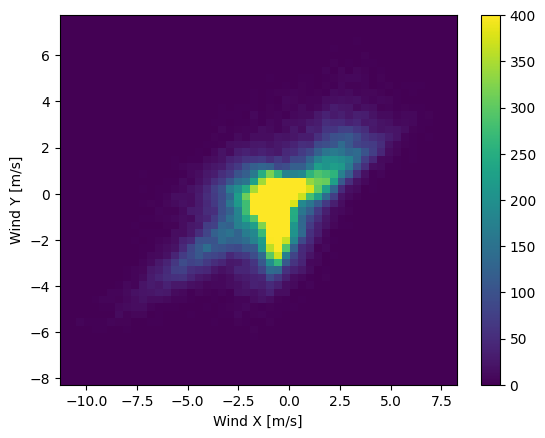

In [10]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50,50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca() ## This line gets the current axes of the plot
ax.axis('tight') ## This sets the plot axis to 'tight', which remove extra whitespace around the plot.

## Time

In [11]:
# converting date_time col into sec
timestamp_s = date_time.map(pd.Timestamp.timestamp)  #This is a method provided by Pandas that converts a Pandas Timestamp object to a Unix timestamp.

In [12]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2*np.pi/day))
df['Day cos'] = np.cos(timestamp_s * (2*np.pi/day))
df['Year sin'] = np.sin(timestamp_s * (2*np.pi/year))
df['Year cos'] = np.cos(timestamp_s * (2*np.pi/year))


Text(0.5, 1.0, 'Time of day signal')

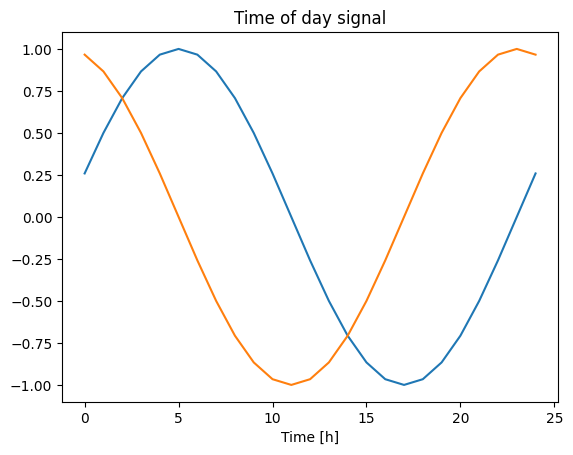

In [13]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

##### The below code performs a Fast Fourier Transform (FFT) on the 'T (degC)' column from the DataFrame df to analyze the frequency components of the temperature data.

Text(0.5, 0, 'Frequency (log scale)')

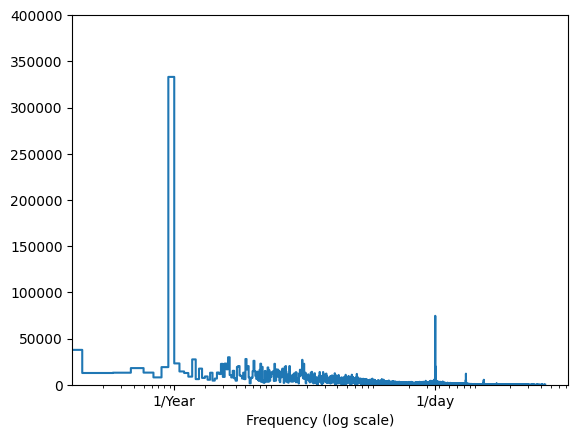

In [14]:
fft = tf.signal.rfft(df['T (degC)'])  # fft = it will contain the frequency domain of the temp. data
f_per_dataset = np.arange(0, len(fft)) # here the array represent the frequency bins for FFT
n_samples_h = len(df['T (degC)']) # calculates the no of temp. samples in the dataframe
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/hours_per_year
f_per_year = f_per_dataset/years_per_dataset # This step is necessary to scale the x-axis of the plot to represent the frequency in cycles per year
plt.step(f_per_year, np.abs(fft)) # This line creates a step plot of the amplitude spectrum obtained from the FFT (np.abs(fft)) against the frequency values in f_per_year. The plt.step() function is used for a step plot, which is suitable for visualizing the spectrum.
plt.xscale('log')  # this sets the x-axis to logarithmic scale to better visualize a wide range of frequencies
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
plt.xlabel('Frequency (log scale)') #This sets the label for the x-axis as 'Frequency (log scale)'.

## Split the data

***Here the df split into train_df, val_df, test_df***

In [15]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

## Normalize the data ( the datasets are normalized by using mean and standard deviation)

In [16]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean)/train_std
val_df = (val_df - train_mean)/train_std
test_df = (test_df - train_mean)/train_std

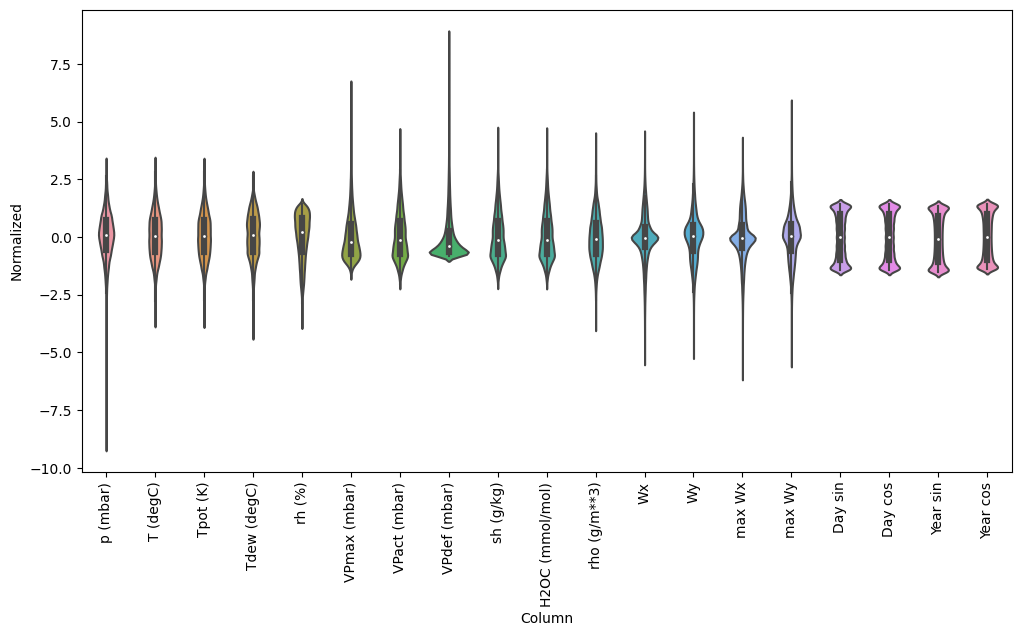

In [17]:
## Here the entire df is standardized using the train_mean and train_std
df_std = (df - train_mean)/train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
# The upper line "melts" the DataFrame df_std to convert it from a wide-form to a long-form representation
# Here Column = holds the names of the original columns from df, Normalized = holds the standardized values corresponding to each column.
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y = 'Normalized', data = df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

## Data windowing
 #### Indexes and offsets
 #### Split
 #### Plot
 #### Create tf.data.datasets

#### It is a technique used in time series analysis and signal processing to break down a sequence of data points into overlapping or non-overlapping segments called windows.
#### used in feature extraction, data analysis, preparing data for ML algorithms

### Indexes and Offsets

In [18]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift, train_df=train_df, val_df=val_df, 
                 test_df=test_df, label_columns=None):
        #store the raw data
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        
        #workout the label column indices
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}
        
        #work out the window parameters
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        
        self.total_window_size = input_width + shift
        
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
        
        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
        
    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [19]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24, label_columns=['T (degC)'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['T (degC)']

In [20]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1, label_columns=['T (degC)'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['T (degC)']

### Split

###### Here we'll use 'split_window' method which is used to split the windowed data into input features and label data

In [21]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :] #this line extracts the input features from the 'features' tensor. It uses slicing to select the columns within the specified self.input_slice indices. The resulting inputs tensor will have the shape [batch_size, input_width, num_features]. 
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
         [labels[:, :, self.column_indices[name]] for name in self.label_columns],axis=-1)
        
    ## slicing doesn't preserve static shape information, so set the shapes manually. This way the 'tf.data.datasets' are easier to inspect
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])
    return inputs, labels

WindowGenerator.split_window = split_window

In [22]:
#stack three slices, the length of the total window
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'window shape: {example_window.shape}')
print(f'inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
window shape: (3, 7, 19)
inputs shape: (3, 6, 19)
labels shape: (3, 1, 1)


### Plot

###### Here is the method to visualize the split window

In [23]:
w2.example = example_inputs, example_labels

In [24]:
def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12,8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                label='Inputs', marker='.', zorder=-10)
        
        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index
            
        if label_col_index is None:
            continue
            
        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                   edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                       marker='X', edgecolors='k', label='Predictions', c='#ff7f0e', s=64)
        
        if n==0:
            plt.legend()
            
    plt.xlabel('Time [h]')
    
WindowGenerator.plot = plot

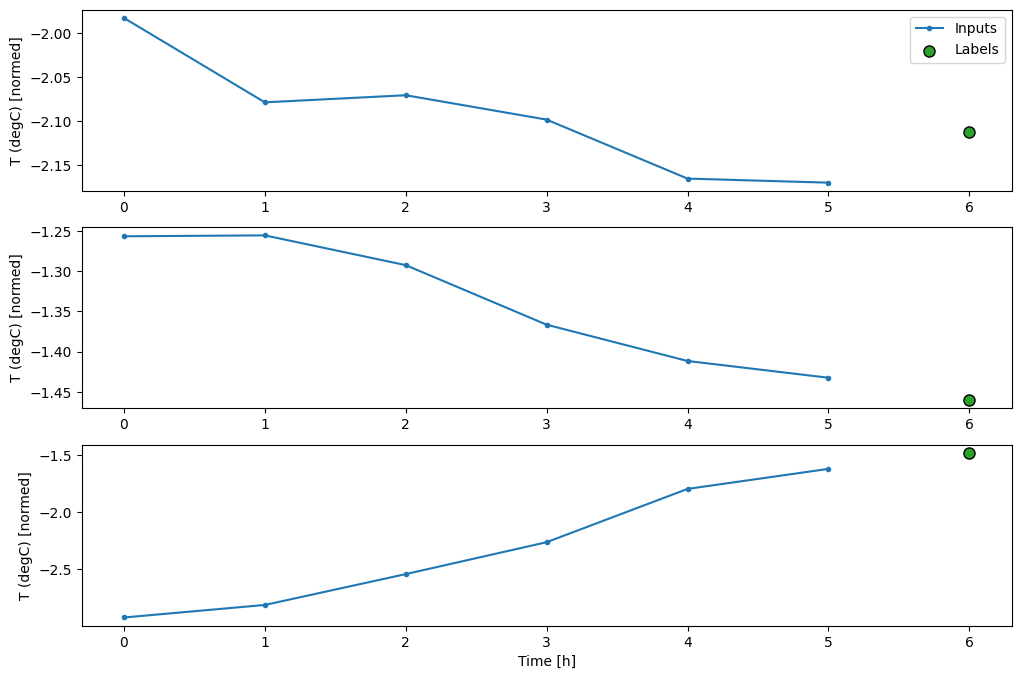

In [25]:
w2.plot()

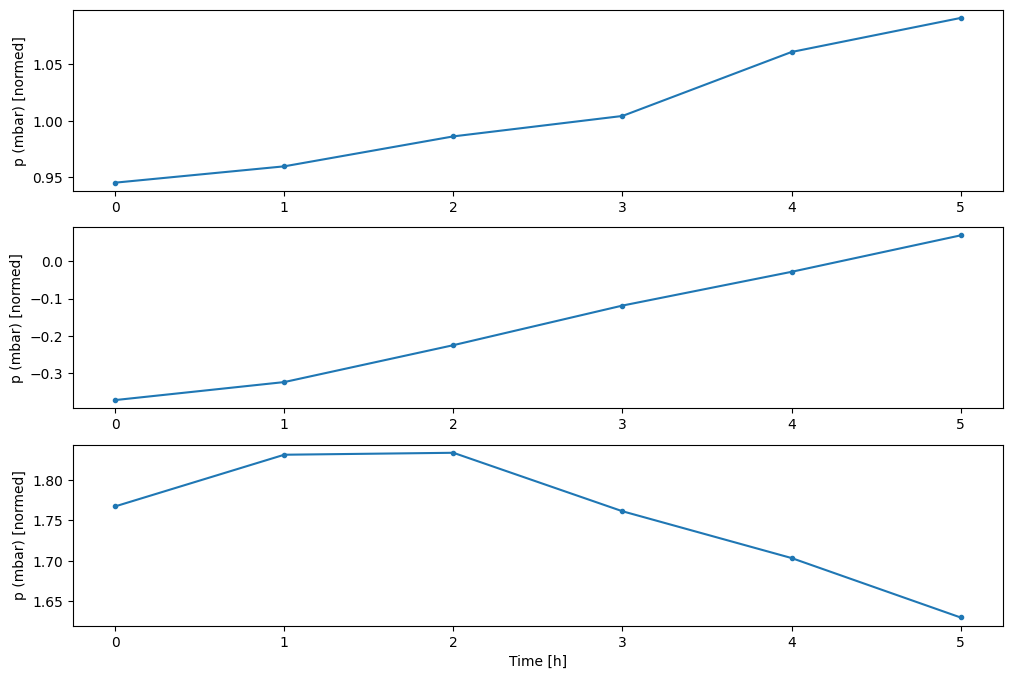

In [26]:
w2.plot(plot_col='p (mbar)')

### Create tf.data.Datasets

In [27]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data = data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32)
    ds = ds.map(self.split_window)
    
    return ds
WindowGenerator.make_dataset = make_dataset

##### To create datasets for training, validation, testing and example batch for plotting:

In [28]:
@property ##  This is a decorator used to define a method as a property.
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    '''Get and cache an example batch of `inputs, labels` for plotting'''
    result = getattr(self, '_example', None)
    if result is None:
        result = next(iter(self.train))
        self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [29]:
# Here the 'Dataset.element_spec' property tells us the structure, data types, and shapes of the dataset elements.
# Each elements is an (inputs, label) pair

w2.train.element_spec

(TensorSpec(shape=(None, 6, 19), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [30]:
for example_inputs, example_labels in w2.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 19)
Labels shape (batch, time, features): (32, 1, 1)


## Single step models

1. Baseline
2. Linear model
3. Dense
4. Multi-step dense
5. CNN
6. RNN
7. Performance
8. Multi-output models

In [31]:
single_step_window = WindowGenerator(input_width=1, label_width=1, shift=1,
                                    label_columns=['T (degC)'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['T (degC)']

In [32]:
for example_inputs, example_labels in single_step_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 19)
Labels shape (batch, time, features): (32, 1, 1)


### 1) Baseline

In [33]:
class Baseline(tf.keras.Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index
        
    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

##### Instaniate and evaluate this model:

In [34]:
baseline = Baseline(label_index=column_indices['T (degC)'])

baseline.compile(loss = tf.keras.losses.MeanSquaredError(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

439/439 [==============================] - 1s 818us/step - loss: 0.0128 - mean_absolute_error: 0.0785


In [35]:
wide_window = WindowGenerator(input_width=24, label_width=24, shift=1, label_columns=['T (degC)'])
wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['T (degC)']

In [36]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 19)
Output shape: (32, 24, 1)


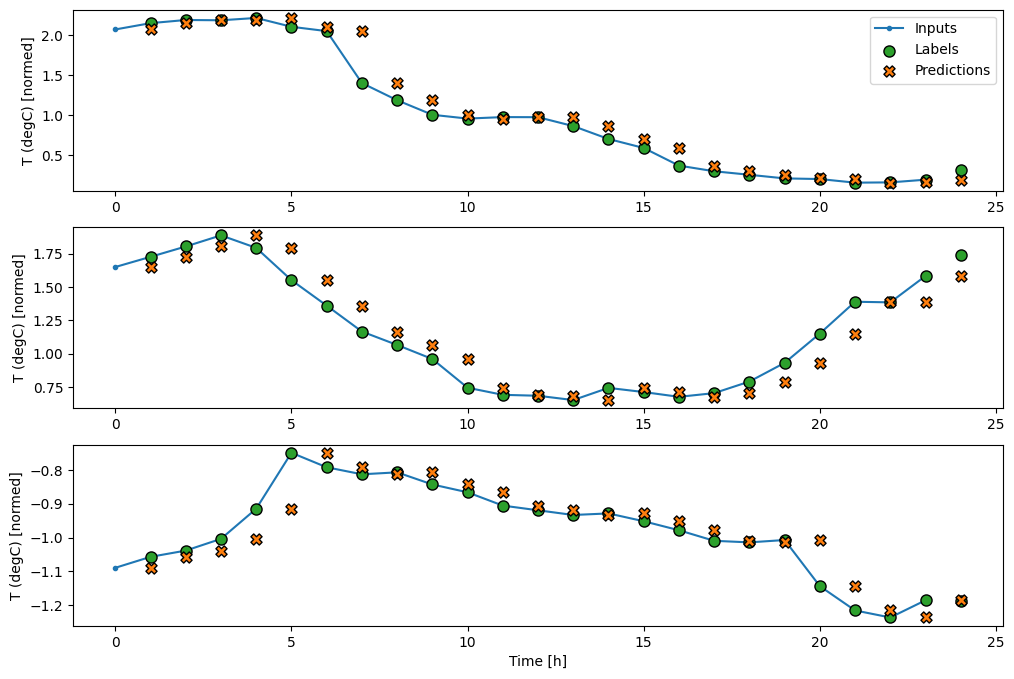

In [37]:
wide_window.plot(baseline)

##### Blue = Inputs - This line shows the input temperature at each time step. The model receives all features, this plot only shows the temperature.
##### Green = labels -  dots show the target prediction value. These dots are shown at the prediction time, not the input time. That is why the range of labels is shifted 1 step relative to the inputs.
##### Orange = Predictions -  crosses are the model's prediction's for each output time step. If the model were predicting perfectly the predictions would land directly on the Labels.

### 2) Linear model

The simplest trainable model we can apply to this task is to insert linear transformation between the input and output.

In [38]:
linear = tf.keras.Sequential([tf.keras.layers.Dense(units=1)])

In [39]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 19)
Output shape: (32, 1, 1)


##### This tutorial trains many models, so package the training procedure into a function:

In [40]:
MAX_EPOCHS = 20
def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, 
                                                      mode='min')
    
    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = [tf.keras.metrics.MeanAbsoluteError()])
    
    history = model.fit(window.train, epochs = MAX_EPOCHS, validation_data = window.val,
                       callbacks = [early_stopping])
    return history

##### Train the model and evaluate its performance

In [41]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
1534/1534 [==============================] - 2s 1ms/step - loss: 0.1783 - mean_absolute_error: 0.2334 - val_loss: 0.0119 - val_mean_absolute_error: 0.0815
Epoch 2/20
1534/1534 [==============================] - 2s 1ms/step - loss: 0.0104 - mean_absolute_error: 0.0754 - val_loss: 0.0095 - val_mean_absolute_error: 0.0721
Epoch 3/20
1534/1534 [==============================] - 2s 1ms/step - loss: 0.0095 - mean_absolute_error: 0.0720 - val_loss: 0.0090 - val_mean_absolute_error: 0.0698
Epoch 4/20
1534/1534 [==============================] - 2s 1ms/step - loss: 0.0092 - mean_absolute_error: 0.0705 - val_loss: 0.0088 - val_mean_absolute_error: 0.0683
Epoch 5/20
1534/1534 [==============================] - 2s 1ms/step - loss: 0.0091 - mean_absolute_error: 0.0701 - val_loss: 0.0088 - val_mean_absolute_error: 0.0687
Epoch 6/20
1534/1534 [==============================] - 2s 1ms/step - loss: 0.0091 - mean_absolute_error: 0.0700 - val_loss: 0.0087 - val_mean_absolute_error: 0.0686
Epoc

In [42]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', linear(wide_window.example[0]).shape)

Input shape: (32, 24, 19)
Output shape: (32, 24, 1)


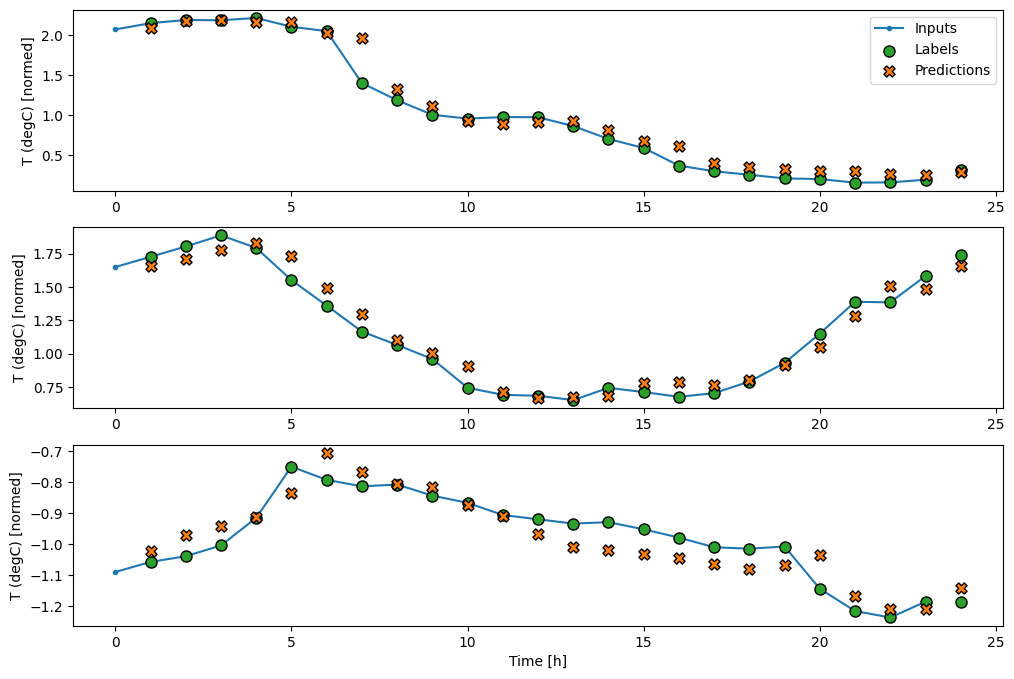

In [43]:
wide_window.plot(linear)

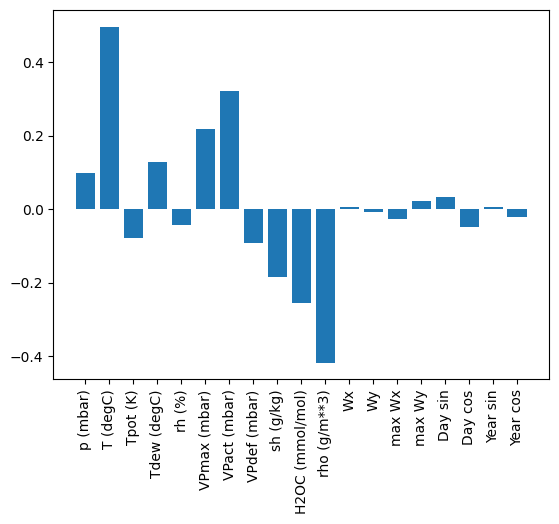

In [44]:
plt.bar(x=range(len(train_df.columns)),
       height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

### 3) Dense

Before applying models that actually operate on multiple time-steps, it's worth checking the performance of deeper, more powerful, single input step models.

In [45]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
1534/1534 [==============================] - 4s 2ms/step - loss: 0.0131 - mean_absolute_error: 0.0781 - val_loss: 0.0082 - val_mean_absolute_error: 0.0668
Epoch 2/20
1534/1534 [==============================] - 4s 2ms/step - loss: 0.0078 - mean_absolute_error: 0.0641 - val_loss: 0.0072 - val_mean_absolute_error: 0.0614
Epoch 3/20
1534/1534 [==============================] - 4s 2ms/step - loss: 0.0074 - mean_absolute_error: 0.0620 - val_loss: 0.0072 - val_mean_absolute_error: 0.0610
Epoch 4/20
1534/1534 [==============================] - 4s 2ms/step - loss: 0.0071 - mean_absolute_error: 0.0603 - val_loss: 0.0068 - val_mean_absolute_error: 0.0590
Epoch 5/20
1534/1534 [==============================] - 4s 2ms/step - loss: 0.0070 - mean_absolute_error: 0.0596 - val_loss: 0.0069 - val_mean_absolute_error: 0.0595
Epoch 6/20
1534/1534 [==============================] - 4s 2ms/step - loss: 0.0068 - mean_absolute_error: 0.0588 - val_loss: 0.0066 - val_mean_absolute_error: 0.0564
Epoc

### 4) Multi-step Dense

Here the model will take multiple time steps as input to produce a single output.

Create a WindowGenerator that will produce batches of three-hour inputs and one-hour labels:

In [46]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width = 1,
    shift = 1,
    label_columns = ['T (degC)'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['T (degC)']

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1hour into the future.')

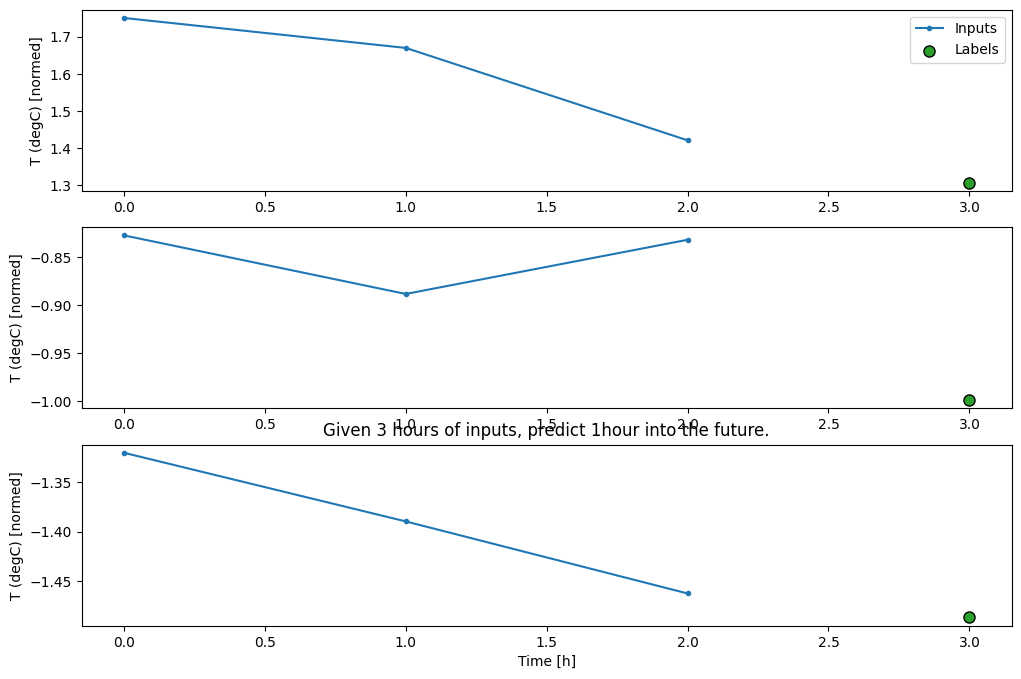

In [47]:
conv_window.plot()
plt.title('Given 3 hours of inputs, predict 1hour into the future.')

In [48]:
multi_step_dense = tf.keras.Sequential([
    # shape: (time, features) = time*features
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1), ## this layer is the final prediction that outputs a single value
    
    tf.keras.layers.Reshape([1, -1]) ## This reshape the output of the previous layer and adding back
                                       # the time dimension.
])

In [49]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 19)
Output shape: (32, 1, 1)


In [50]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

438/438 [==============================] - 0s 863us/step - loss: 0.0062 - mean_absolute_error: 0.0559


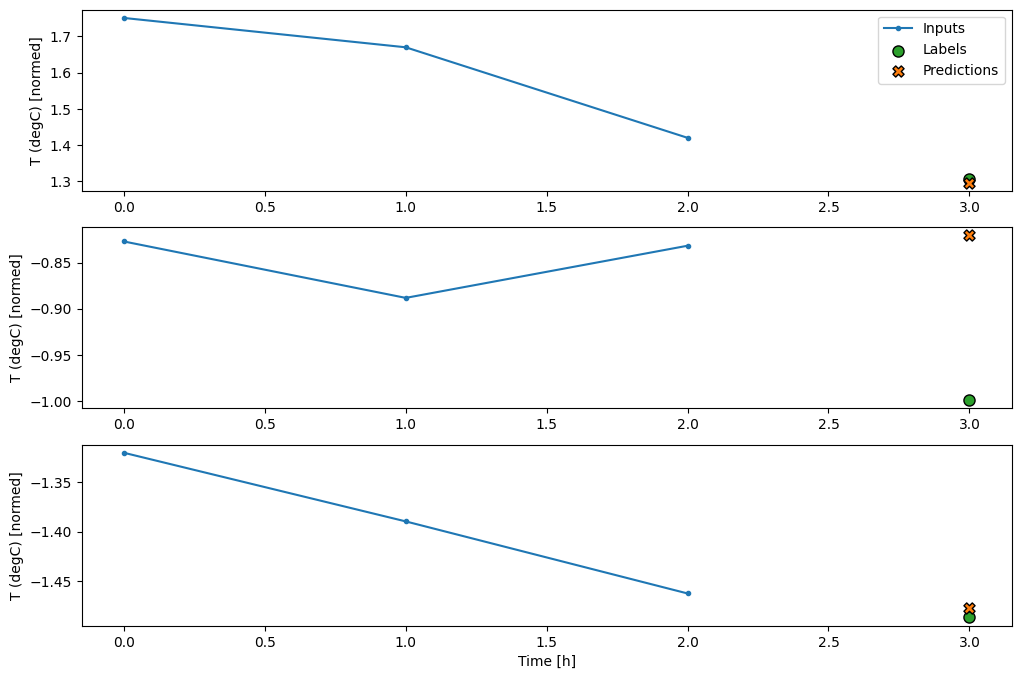

In [51]:
conv_window.plot(multi_step_dense)

##### To print the shape of the input and output data and to catch and handle any exceptions that might occur during the model prediction process:

In [52]:
print('Input shape:', wide_window.example[0].shape)
try:
    print('Output shape:', multi_step_dense[0].shape)
except Exception as e:
    print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 19)

TypeError:'Sequential' object is not subscriptable


[TypeError:'Sequential' object is not subscriptable]  **the convolutional model in the next section fix the problem.**

### 5) CNN

A convolution layer **(tf.keras.layers.Conv1D)** also takes multiple time steps as input to each prediction.

Changes:
1. The **tf.keras.layers.Flatten** and the first **tf.keras.layers.Dense** are replaced by a ***tf.keras.layers.Conv1D.***
2. The **tf.keras.layers.Reshape** is no longer necessary since the convolution keeps the time axis in its output.

In [53]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=(CONV_WIDTH), activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [54]:
print('Conv model on `conv_window`')
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 19)
Output shape: (32, 1, 1)


Train and evaluate it on the **conv_window** and it should give performance similar to the **multi_step_dense model.**

In [55]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

438/438 [==============================] - 1s 2ms/step - loss: 0.0067 - mean_absolute_error: 0.0580


***The difference between this conv_model and the multi_step_dense model is that the conv_model can be run on inputs of any length.***

If we run it on wider input, it produces wider output:

In [56]:
print('Wide window')
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)


Wide window
Input shape: (32, 24, 19)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


Note that the output is shorter than the input. To make training or plotting work, we need the labels, and prediction to have the same length. So build a **WindowGenerator** to produce wide windows with a few extra input time steps so the label and prediction lengths match:

In [57]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width = INPUT_WIDTH,
    label_width = LABEL_WIDTH,
    shift = 1,
    label_columns = ['T (degC)'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['T (degC)']

In [58]:
print('Wide conv window')
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 19)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


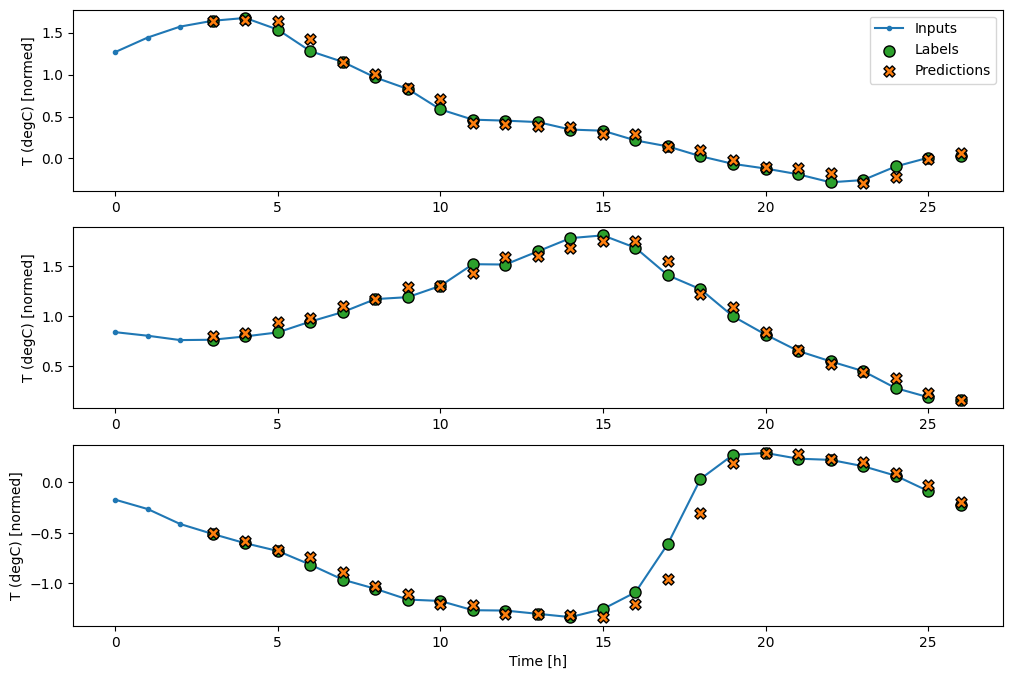

In [59]:
wide_conv_window.plot(conv_model)

### 6) RNN

A Recurrent Neural Network (RNN) is a type of neural network well-suited to time series data. RNNs process a time series step-by-step, maintaining an internal state from time-step to time-step.

In this tutorial, we will use an RNN layer called **Long Short-Term Memory** ***(tf.keras.layers.LSTM).***

In [60]:
lstm_model = tf.keras.models.Sequential([
    # shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # shape [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

With return_sequences=True, the model can be trained on 24 hours of data at a time.

In [61]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 19)
Output shape: (32, 24, 1)


In [62]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

438/438 [==============================] - 1s 3ms/step - loss: 0.0056 - mean_absolute_error: 0.0519


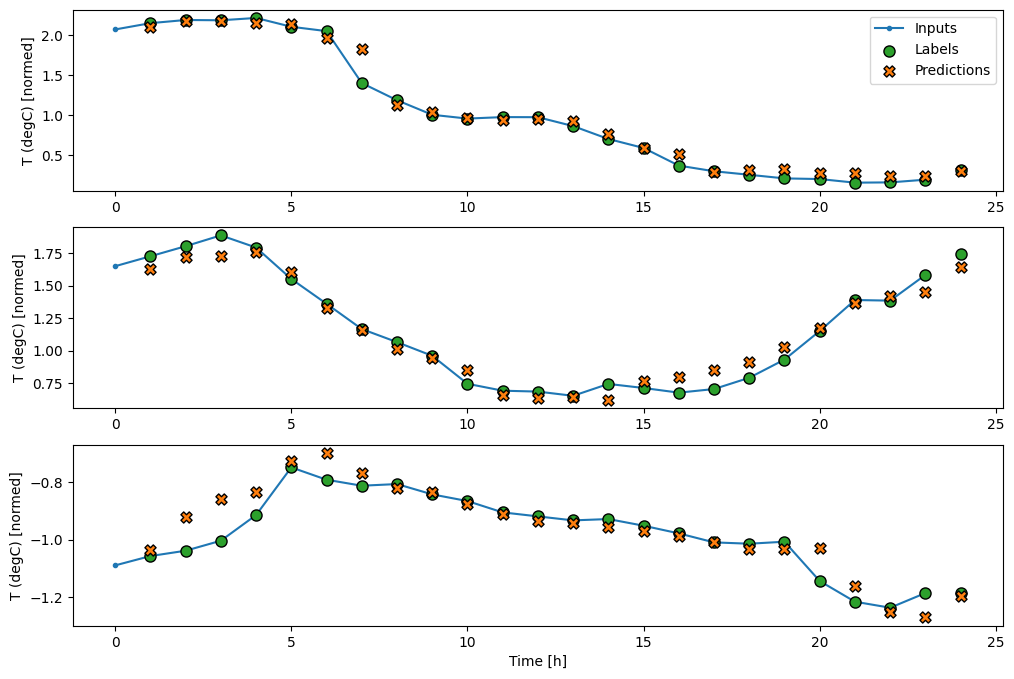

In [63]:
wide_window.plot(lstm_model)

### 7) Performance

###### Plotting a bar chart that compares the Mean Absolute Error(MAE) metrics of different models on both the validation and test datasets. This plot helps to visualize how well the models are performing in terms of MAE.

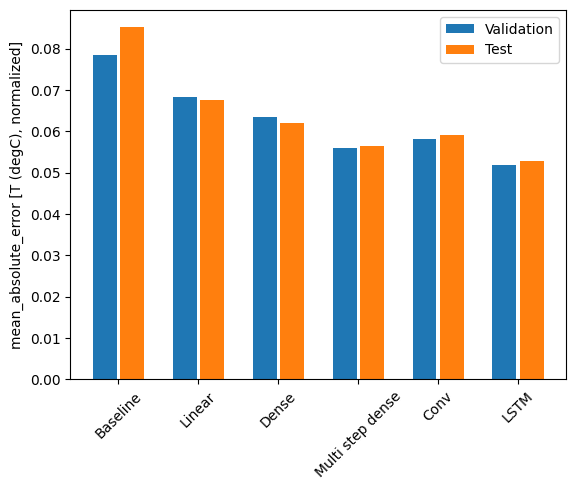

In [64]:
x = np.arange(len(performance))
width=0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

## To create a bar plot including two bars for each plot (one for validation and other for test)
plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label = 'Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(), rotation=45)
_ = plt.legend()

In [65]:
## To print specific metric values for each model with 2nd evaluation
for name, value in performance.items():
    print(f'{name:12s}: {value[1]:0.4f}')


Baseline    : 0.0852
Linear      : 0.0675
Dense       : 0.0621
Multi step dense: 0.0564
Conv        : 0.0592
LSTM        : 0.0529


### 8) Multi-output models

Multi-output models in the context of single-step time series forecasting refer to models that predict multiple variables or features simultaneously for a single time step ahead. In other words, these models produce multiple predictions for different aspects of the time series data at the next time step.

###### a) Baseline
###### b) Dense
###### c) RNN
###### d) Advanced: Residual connections
###### e) Performance

###### All of these models can be converted to predict multiple features just by changing the number of units in the output layer and adjusting the training windows to include all features in the labels (example_labels):

In [66]:
single_step_window = WindowGenerator(
    # 'WindowGenerator' returns all features as labels if we don't set the 'label_columns' argument.
    input_width = 1, label_width = 1, shift = 1)

wide_window = WindowGenerator(input_width = 24, label_width = 24, shift = 1)

for example_inputs, example_labels in wide_window.train.take(1):
    print(f'Input shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Input shape (batch, time, features): (32, 24, 19)
Labels shape (batch, time, features): (32, 24, 19)


#### a) Baseline

The same baseline model (Baseline) can be used here, but this time repeating all features instead of selecting a specific **label_index:**

In [67]:
baseline = Baseline()
baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [68]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

438/438 [==============================] - 1s 971us/step - loss: 0.0886 - mean_absolute_error: 0.1589


#### b) Dense

In [69]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [70]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

439/439 [==============================] - 1s 2ms/step - loss: 0.0703 - mean_absolute_error: 0.1359


#### c) RNN

In [71]:
%%time
wide_windowindowindow = WindowGenerator(input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

438/438 [==============================] - 2s 5ms/step - loss: 0.0616 - mean_absolute_error: 0.1201
CPU times: total: 2min 15s
Wall time: 4min 14s


#### d) Advanced: Residual connections

A residual connection (or skip connection) is a technique that allows the model to learn the residual or difference between the input and the output. 

This technique was popularized by the development of the ResNet architecture for image classification tasks but can also be applied to other types of models, including multi-output models in time series forecasting.

In a residual connection, the original input is added (or concatenated) to the output of a certain layer or set of layers within the neural network

In [72]:
class ResidualWrapper(tf.keras.Model):
# The ResidualWrapper class is a custom wrapper for a neural network model that implements a residual 
# connection. The purpose of this wrapper is to modify the behavior of the input-output relationship 
# by adding a residual connection between the input and the output of the model.
    def __init__(self, model):
        super().__init__()
        self.model = model
        
    def call(self, inputs, *args, **kwargs): # the call method defines the forward pass of the wrapped
                                             # model.
        delta = self.model(inputs, *args, **kwargs)
        
        # The prediction for each time step is the input from the previous time step plus the delta
        # calculated by the model.
        
        return inputs+delta
    
    

In [73]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
        tf.keras.layers.LSTM(32, return_sequences=True),
        tf.keras.layers.Dense(
            num_features,
        # The predicted deltas should start small. Therefore, initialize the output layer with zeros.
            kernel_initializer=tf.initializers.zeros())
    ]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)



438/438 [==============================] - 3s 6ms/step - loss: 0.0620 - mean_absolute_error: 0.1176
CPU times: total: 1min 35s
Wall time: 2min 9s


#### e) Performance

Here is the overall performance for these multi-output models.

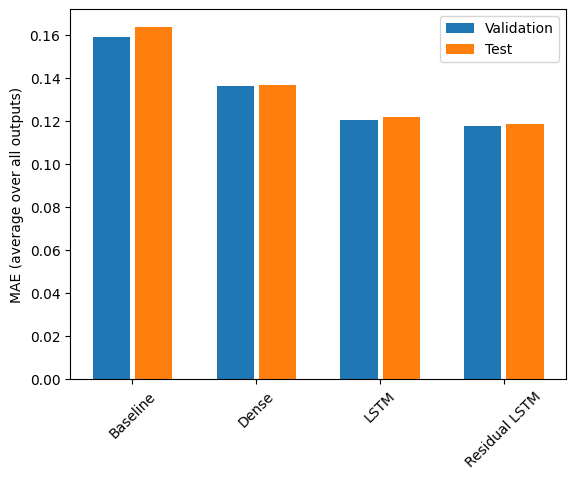

In [74]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(), rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [75]:
for name,value in performance.items():
    print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 0.1638
Dense          : 0.1366
LSTM           : 0.1216
Residual LSTM  : 0.1187


The above performances are averaged across all model outputs.

## Multi step models

This section looks at how to expand these models to make multiple time step predictions.

1. Baseline
2. Single-shot models
3. Advanced: Autoregressive model
4. Performance

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

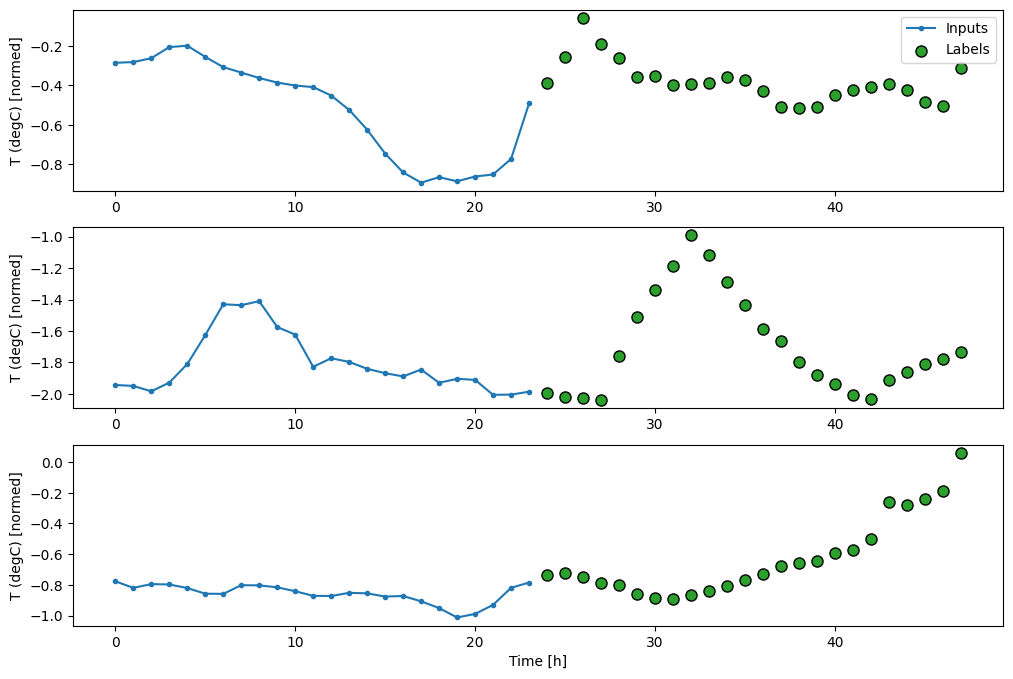

In [76]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24, label_width=OUT_STEPS, shift=OUT_STEPS)
multi_window.plot()
multi_window

### 1. Baseline

A simple baseline for this task is to repeat the last input time step for the required number of output time steps:

437/437 [==============================] - 1s 875us/step - loss: 0.6285 - mean_absolute_error: 0.5007


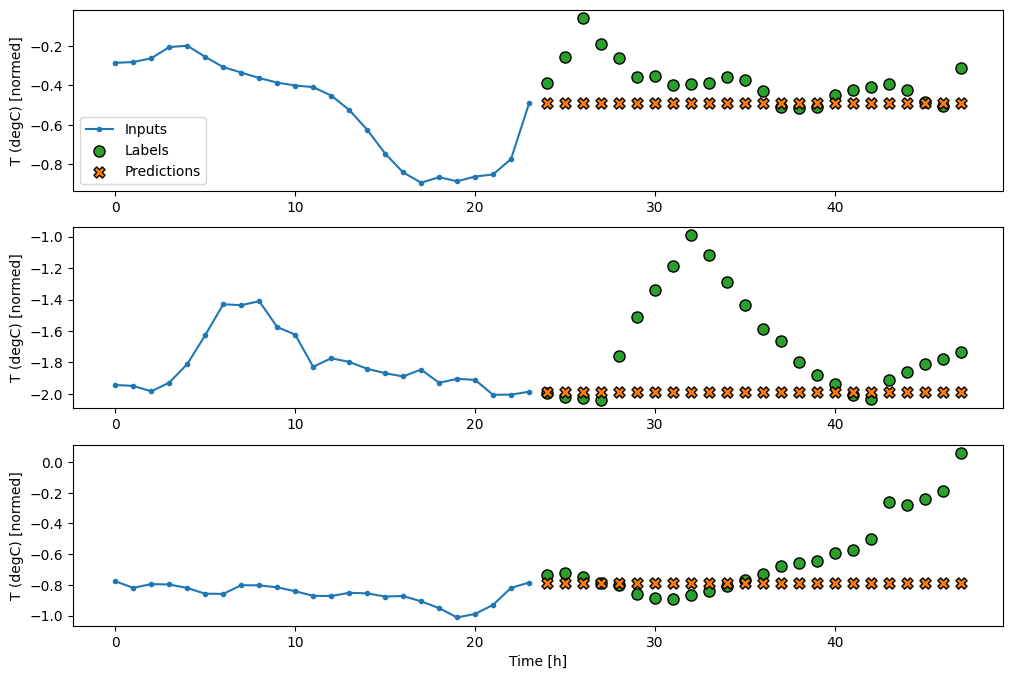

In [77]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

Since this task is to predict 24 hours into the future, given 24 hours of the past, another simple approach is to repeat the previous day, assuming tomorrow will be similar:

437/437 [==============================] - 1s 1ms/step - loss: 0.4270 - mean_absolute_error: 0.3959


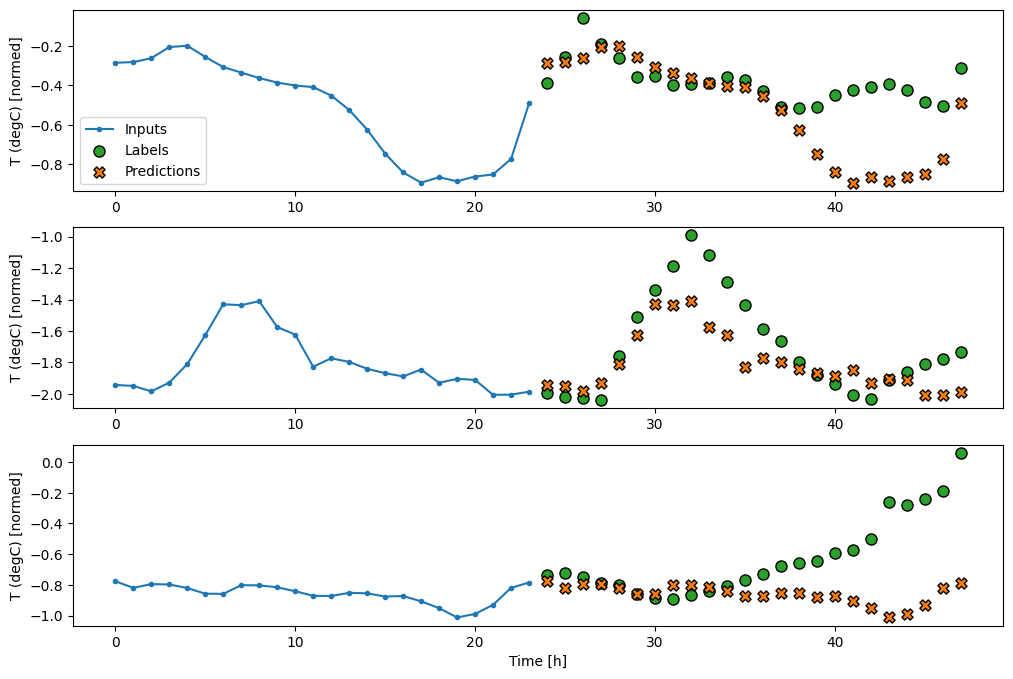

In [78]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                        metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

### 2. Single-shot models

One high-level approach to this problem is to use a "single-shot" model, where the model makes the entire sequence prediction in a single step.

1. Linear
2. Dense
3. CNN
4. RNN

#### Linear

437/437 [==============================] - 1s 1ms/step - loss: 0.2561 - mean_absolute_error: 0.3049


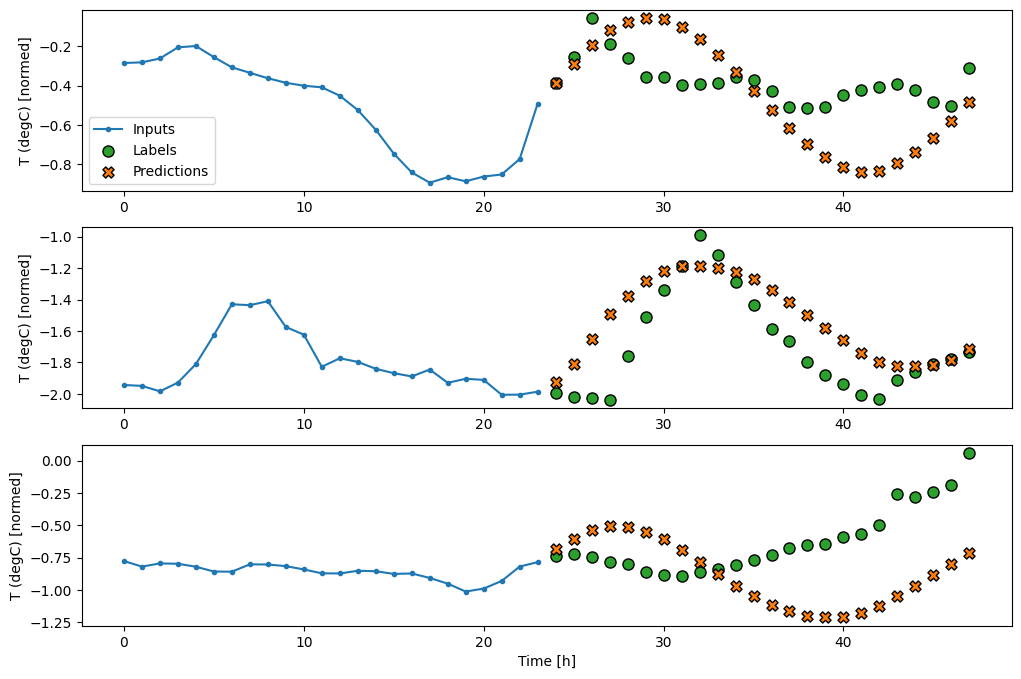

In [79]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1, :]),
    # Shape [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features, kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

#### Dense

Adding a **tf.keras.layers.Dense** between the input and output gives the linear model more power, but is still only based on a single input time step.

437/437 [==============================] - 1s 2ms/step - loss: 0.2188 - mean_absolute_error: 0.2805


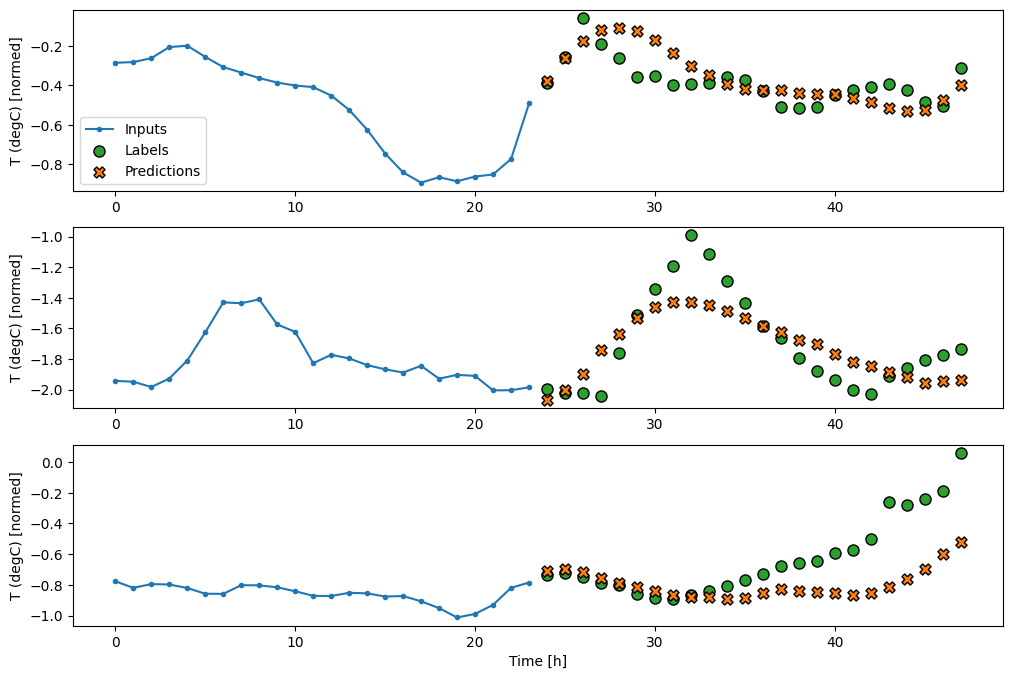

In [80]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time-step
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1, :]),
    # shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features, kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])
history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

#### CNN

A convolutional model makes predictions based on a fixed-width history, which may lead to better performance than the dense model since it can see how things are changing over time:

437/437 [==============================] - 1s 2ms/step - loss: 0.2137 - mean_absolute_error: 0.2802


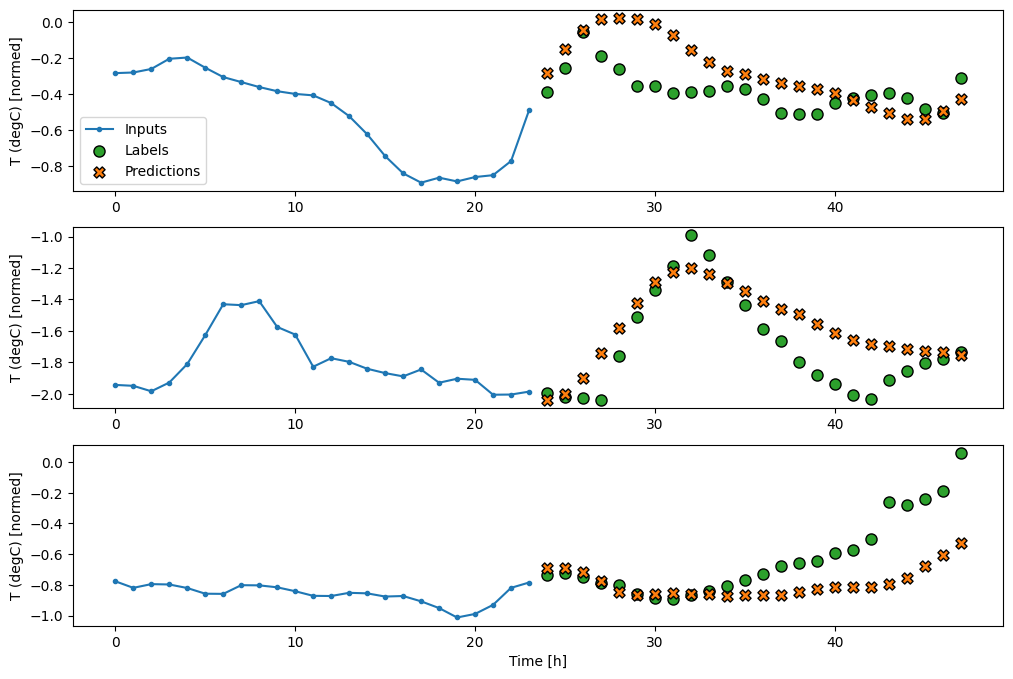

In [81]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # shape [batch, time, features] => [batch, CONV_WIDTH, features]
    # Here lambda layer used to extract the most recent 'CONV_WIDTH' time steps from the input sequences
    tf.keras.layers.Lambda(lambda x:x[:, -CONV_WIDTH:, :]),
    # shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size = CONV_WIDTH),
    # shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features, kernel_initializer=tf.initializers.zeros()),
    # shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv']  = multi_conv_model.evaluate(multi_window.test, verbose=0)

multi_window.plot(multi_conv_model)

#### RNN

437/437 [==============================] - 2s 3ms/step - loss: 0.2160 - mean_absolute_error: 0.2852


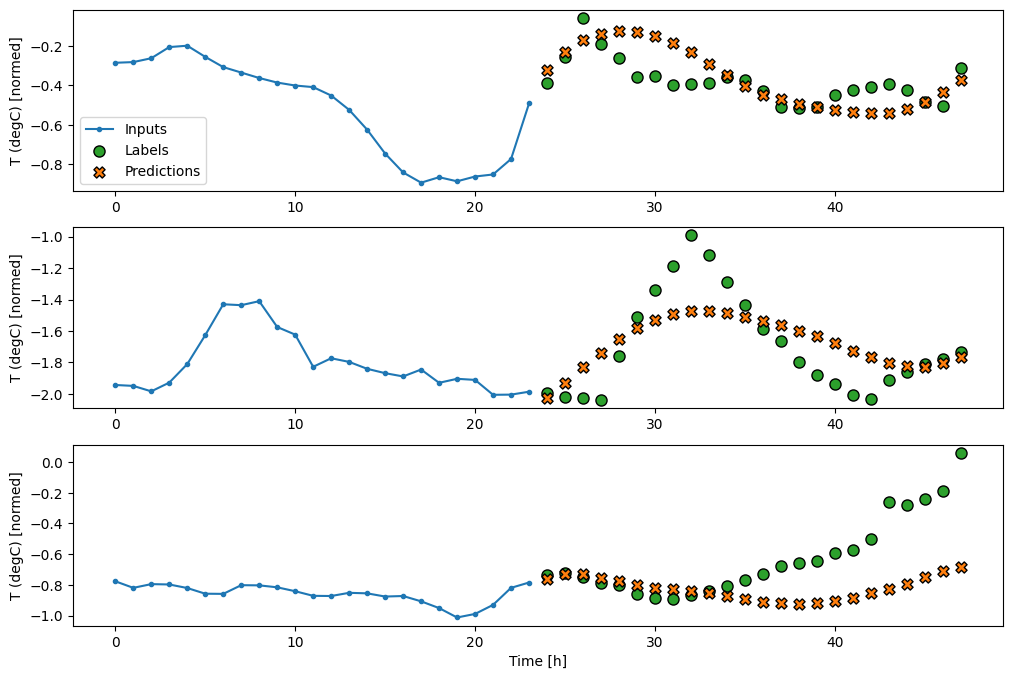

In [82]:
multi_lstm_model = tf.keras.Sequential([
    # shape [batch, time, features] => [batch, lstm_units]
    # adding more lstm_units just overfits more quickly
    # here 'return_seuences = False' indicating that the LSTM layer will only return the output at the
    # last time step rather than the entire sequence which can help to reduce overfitting
    tf.keras.layers.LSTM(32, return_sequences=False),
    # shape [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features, kernel_initializer=tf.initializers.zeros()),
    # shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

### 3. Advanced: Autoregressive model

We could take any of the single-step multi-output models trained in the first half of this tutorial and run in an autoregressive feedback loop, but here we'll focus on building a model that's been explicitly trained to do that.

This tutorial only builds an autoregressive RNN model, but this pattern could be applied to any model that was designed to output a single time step.

In this case, the model has to manually manage the inputs for each step, so it uses **tf.keras.layers.LSTMCell** directly for the lower level, single time step interface.

In [83]:
class FeedBack(tf.keras.Model):
    def __init__(self, units, out_steps):
        super().__init__()
        self.out_steps = out_steps
        self.units = units
        # The LSTM cell is a fundamental building block for modeling temporal dependencies.
        self.lstm_cell = tf.keras.layers.LSTMCell(units)
        # Also wrap the LSTMCell in an RNN to simplify the 'warmup' method
        self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell,return_state=True)
        self.dense = tf.keras.layers.Dense(num_features)

The feedback mechanism is implemented in the warmup method. During the warm-up phase, the model generates initial predictions without considering its own predictions. After the warm-up, the model starts using its own predictions as inputs for forecasting future time steps. 

In [84]:
feedback_model = FeedBack(units = 32, out_steps=OUT_STEPS)

The first method this model needs is a **warmup** method to initialize its internal state based on the inputs. Once trained, this state will capture the relevant parts of the input history. This is equivalent to the single-step LSTM model from earlier:

In [85]:
def warmup(self, inputs):
    # input.shape => (batch, time, features)
    # x.shape => (batch, lstm_units)
    x, *state = self.lstm_rnn(inputs)
    
    # prediction.shape => (batch, features)
    prediction = self.dense(x)
    return prediction, state

FeedBack.warmup = warmup

This method returns a single time-step prediction and the internal state of the LSTM:



In [86]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 19])

With the RNN's state, and an initial prediction you can now continue iterating the model feeding the predictions at each step back as the input.

The simplest approach for collecting the output predictions is to use a Python list and a tf.stack after the loop.

In [87]:
def call(self, inputs, training=None):
    # use a TensorArray to capture dynamically unrolled predictions over time.
    predictions = []
    # initialize the LSTM state
    prediction, state = self.warmup(inputs)
    
    # Insert the first prediction
    predictions.append(prediction)
    
    # Run the rest of the prediction steps
    for n in range(1, self.out_steps):
        # use the last prediction as input
        x = prediction
        # execute one lstm step
        x, state = self.lstm_cell(x, states=state, training=training)
        # convert the lstm output to a prediction
        prediction = self.dense(x)
        # Add the prediction to the output
        predictions.append(prediction)
        
    # prediction.shape => (time, batch, features)
    predictions = tf.stack(predictions)
    # predection.shape => (batch, time, features)
    predictions = tf.transpose(predictions, [1,0,2])
    return predictions

FeedBack.call = call

Test run this model on the example inputs:

In [88]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 19)


Now, train this model

437/437 [==============================] - 6s 13ms/step - loss: 0.2250 - mean_absolute_error: 0.2971


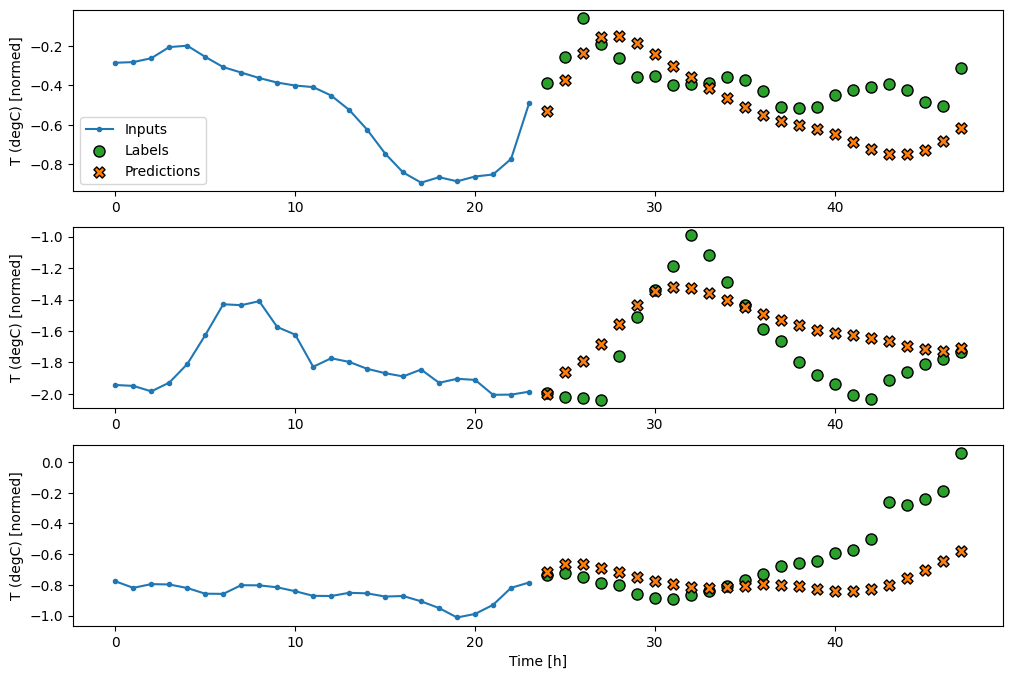

In [89]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

### Performance

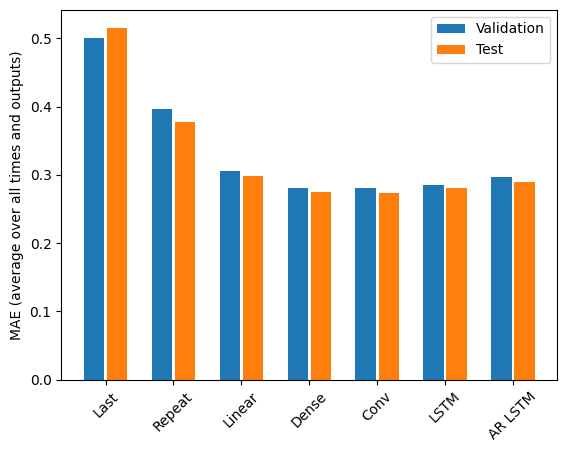

In [91]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label = 'Validation')
plt.bar(x + 0.17, test_mae, width, label = 'Test')
plt.xticks(ticks=x, labels = multi_performance.keys(), rotation = 45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

The metrics for the multi-output models in the first half of this tutorial show the performance averaged across all output features. These performances are similar but also averaged across output time steps.

In [92]:
for name, value in multi_performance.items():
    print(f'{name:8s}: {value[1]:0.4f}')

Last    : 0.5157
Repeat  : 0.3774
Linear  : 0.2986
Dense   : 0.2754
Conv    : 0.2740
LSTM    : 0.2809
AR LSTM : 0.2898
